# 1. Постановка задачи  
Данные связаны с прямыми маркетинговыми кампаниями португальского банковского учреждения. Маркетинговые кампании проводились с помощью телефонных звонков.  Часто требовалось несколько обращений к одному и тому же клиенту, чтобы узнать, будет ли он оформлять продукт (срочный банковский вклад) («да») или нет («нет»). 

## Условный заказчик
Заказчиком анализа может выступать банк банк-конкурент.
## Возможные задачи ИАД
- поиск ассоциативных правил;
- сегментация клиентов;
- описательная аналитика;

# 2. Паспорт датасета

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/Online Retail.csv', sep=';')

print(f"Всего строк: {df.shape[0]}, Всего столбцов: {df.shape[1]}")

print("\nИзначальные типы:")

for col in df.columns:
    dtype = df[col].dtype
    description = ""
    match col:
        case 'InvoiceNo':
            description = "Номер заказа"
        case 'StockCode':
            description = "Код товара"
        case 'Description':
            description = "Название/описание товара"
        case 'Quantity':
            description = "Количество товара в заказе (может быть отрицательным для возвратов)"
        case 'InvoiceDate':
            description = "Дата и время создания заказа"
        case 'UnitPrice':
            description = "Цена за единицу товара (в фунтах стерлингов)"
        case 'CustomerID':
            description = "Уникальный идентификатор клиента"
        case 'Country':
            description = "Страна доставки/клиента"
    print(f"{col:<15} {str(dtype):<10} - {description}")

print("\nПреобразование типов к более подходящим:")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d.%m.%Y %H:%M', errors='coerce')
print("InvoiceDate: преобразован в datetime")
df['UnitPrice'] = df['UnitPrice'].str.replace(',', '.').astype(float)
print("UnitPrice: преобразован в float")
df['CustomerID'] = df['CustomerID'].astype('Int64')
print("CustomerID: преобразован в Int64")
df['InvoiceNo'] = df['InvoiceNo'].astype('category')
print("InvoiceNo: преобразован в category")
df['StockCode'] = df['StockCode'].astype('category')
print("StockCode: преобразован в category")
df['Country'] = df['Country'].astype('category')
print("Country: преобразован в category")

print("\nИтоговые типы данных:")
print(df.dtypes)


Всего строк: 541909, Всего столбцов: 8

Изначальные типы:
InvoiceNo       str        - Номер заказа
StockCode       str        - Код товара
Description     str        - Название/описание товара
Quantity        int64      - Количество товара в заказе (может быть отрицательным для возвратов)
InvoiceDate     str        - Дата и время создания заказа
UnitPrice       str        - Цена за единицу товара (в фунтах стерлингов)
CustomerID      float64    - Уникальный идентификатор клиента
Country         str        - Страна доставки/клиента

Преобразование типов к более подходящим:
InvoiceDate: преобразован в datetime
UnitPrice: преобразован в float
CustomerID: преобразован в Int64
InvoiceNo: преобразован в category
StockCode: преобразован в category
Country: преобразован в category

Итоговые типы данных:
InvoiceNo            category
StockCode            category
Description               str
Quantity                int64
InvoiceDate    datetime64[us]
UnitPrice             float64
CustomerID  

# 3. Аудит качества данных

Пропуски (Missing Values)

             Количество пропусков  Доля пропусков, %
InvoiceNo                       0               0.00
StockCode                       0               0.00
Description                  1454               0.27
Quantity                        0               0.00
InvoiceDate                     0               0.00
UnitPrice                       0               0.00
CustomerID                 135080              24.93
Country                         0               0.00

Наиболее проблемные признаки:
- CustomerID: 24.93% пропусков
- Description: 0.27% пропусков

Вывод:
CustomerID: ~25% пропусков - критично для анализа клиентского поведения
Description: 0.27% пропусков - не критично
Остальные признаки: пропусков нет

Дубликаты
Полностью дублирующихся строк: 5268
Типические проблемы значений

Числовые признаки:

Quantity:
  Min: -80995, Max: 80995
  Mean: 9.55, Std: 218.08
  Медиана: 3.00
  Отрицательные значения (возвраты): 10624

UnitPrice:
  Min: -11062.06

C:\Users\ilipa\AppData\Local\Temp\ipykernel_11756\4073058458.py:94: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\ilipa\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


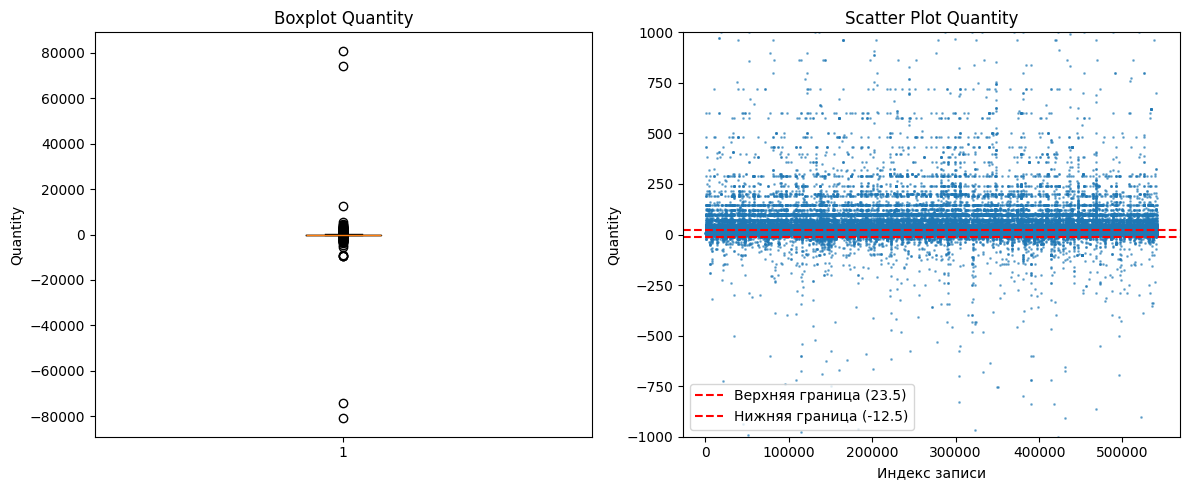

Анализ выбросов для UnitPrice:
Метод IQR (границы: [-3.1, 8.4]):
  Выбросов: 39627 (7.31%)


C:\Users\ilipa\AppData\Local\Temp\ipykernel_11756\4073058458.py:94: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\ilipa\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


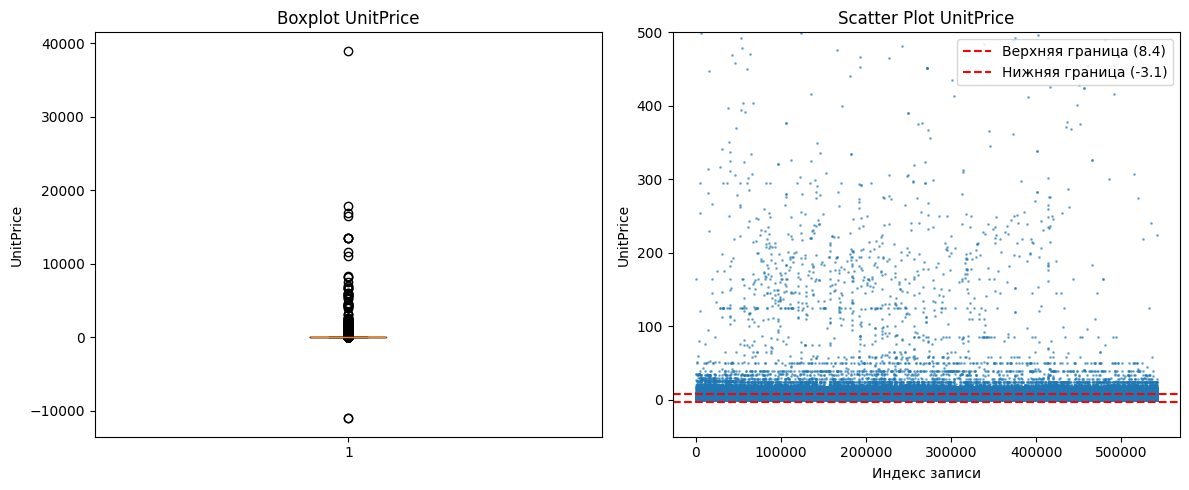

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Пропуски (Missing Values)\n")

missing_data = pd.DataFrame({
    'Количество пропусков': df.isnull().sum(),
    'Доля пропусков, %': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_data)

print("\nНаиболее проблемные признаки:")
print(f"- CustomerID: {missing_data.loc['CustomerID', 'Доля пропусков, %']}% пропусков")
print(f"- Description: {missing_data.loc['Description', 'Доля пропусков, %']}% пропусков")

print("\nВывод:")
print("CustomerID: ~25% пропусков - критично для анализа клиентского поведения")
print("Description: 0.27% пропусков - не критично")
print("Остальные признаки: пропусков нет")

print("\nДубликаты")

full_duplicates = df.duplicated().sum()
print(f"Полностью дублирующихся строк: {full_duplicates}")

print("Типические проблемы значений\n")

print("Числовые признаки:")
numeric_cols = ['Quantity', 'UnitPrice']
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  Min: {df[col].min()}, Max: {df[col].max()}")
    print(f"  Mean: {df[col].mean():.2f}, Std: {df[col].std():.2f}")
    print(f"  Медиана: {df[col].median():.2f}")
    
    if col == 'Quantity':
        negative = (df[col] < 0).sum()
        print(f"  Отрицательные значения (возвраты): {negative}")
    
    if col == 'UnitPrice':
        zero_price = (df[col] == 0).sum()
        negative_price = (df[col] < 0).sum()
        print(f"  Нулевые цены: {zero_price}")
        print(f"  Отрицательные цены: {negative_price}")

print("\nКатегориальные признаки:")
cat_cols = ['InvoiceNo', 'StockCode', 'Description', 'Country']
for col in cat_cols:
    unique_count = df[col].nunique()
    print(f"\n{col}:")
    print(f"  Уникальных значений: {unique_count}")
    
    if col == 'Description':        
        leading_spaces = df[col].astype(str).str.startswith(' ').sum()
        trailing_spaces = df[col].astype(str).str.endswith(' ').sum()
        print(f"  Значений с начальными пробелами: {leading_spaces}")
        print(f"  Значений с конечными пробелами: {trailing_spaces}")

print("Выбросы (Outliers)\n")

outliers_cols = ['Quantity','UnitPrice']
for col in outliers_cols:
    print(f"Анализ выбросов для {col}:")
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Метод IQR (границы: [{lower_bound:.1f}, {upper_bound:.1f}]):")
    print(f"  Выбросов: {len(outliers_iqr)} ({len(outliers_iqr)/len(df)*100:.2f}%)")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    axes[0].boxplot(df[col].dropna())
    axes[0].set_title(f'Boxplot {col}')
    axes[0].set_ylabel(col)
    
    axes[1].scatter(range(len(df)), df[col], alpha=0.5, s=1)
    axes[1].axhline(y=upper_bound, color='r', linestyle='--', label=f'Верхняя граница ({upper_bound:.1f})')
    axes[1].axhline(y=lower_bound, color='r', linestyle='--', label=f'Нижняя граница ({lower_bound:.1f})')
    axes[1].set_title(f'Scatter Plot {col}')
    axes[1].set_xlabel('Индекс записи')
    axes[1].set_ylabel(col)
    axes[1].legend()
    
    if col == 'Quantity':
        axes[1].set_ylim([-1000, 1000])
    elif col == 'UnitPrice':
        axes[1].set_ylim([-50, 500])
    
    plt.tight_layout()
    plt.show()


# 4. Мини-EDA (разведочный анализ)

Мини-EDA (разведочный анализ)



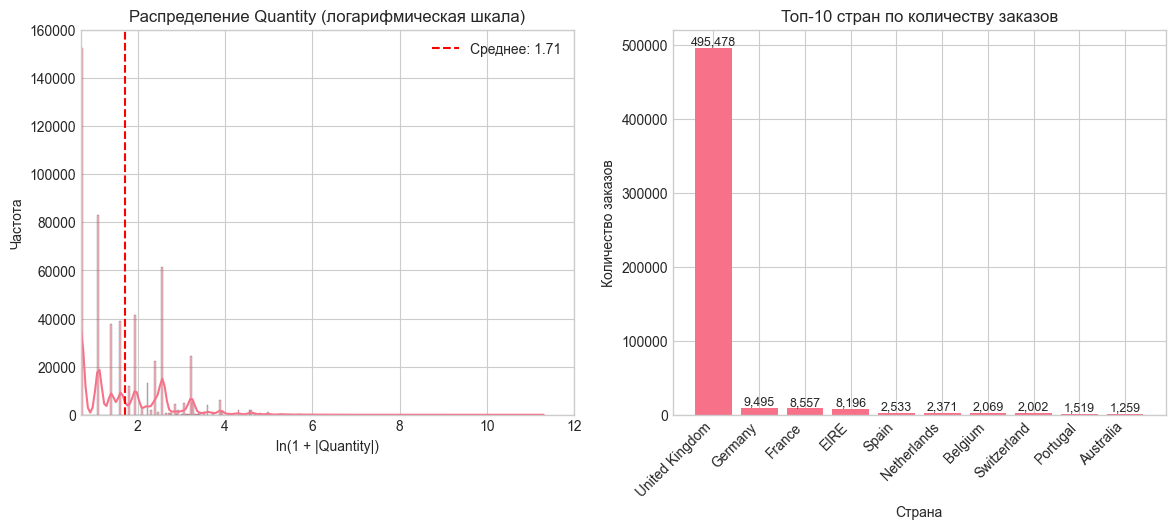

Комментарий к графику 1:
Большинство заказов имеют небольшое количество товаров.
Гипотеза: Большинство покупок - это 1-10 единиц товара, крупные оптовые заказы редки
Вопрос: Какие товары имеют экстремально большие значения Quantity?

Комментарий к графику 2:
Великобритания доминирует с большим отрывом (~90% всех заказов)
Гипотеза: Магазин ориентирован на внутренний рынок Великобритании.
Вопрос: Почему Германия, Франция и Ирландия имеют значительно меньше заказов? Как увеличить количество заказов в других странах?



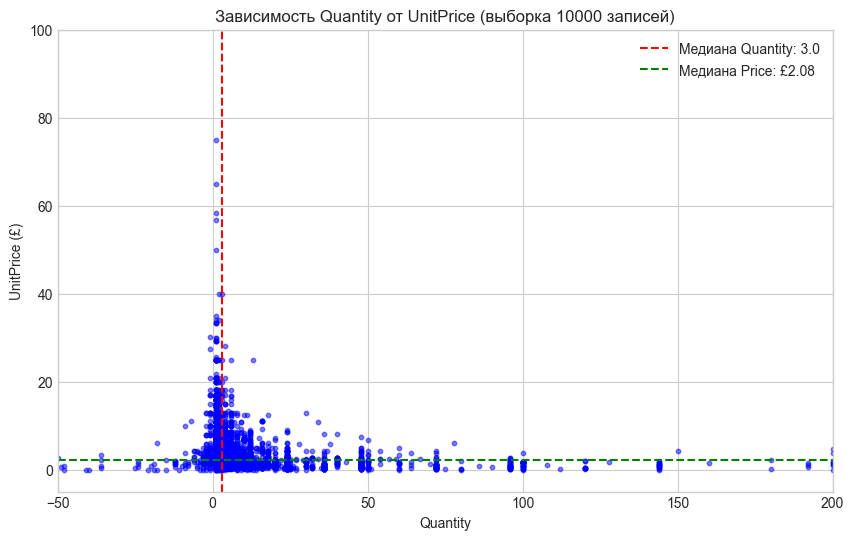

Комментарий к графику 3:
Большинство точек сосредоточено в левом нижнем углу (малое количество, низкая цена).
Гипотеза: Товары с высокой ценой практически не покупают в больших количествах.
Вопрос: Почему практически нет возвратов дорогих товаров?


In [4]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Мини-EDA (разведочный анализ)\n")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
quantity_log = np.log1p(df['Quantity'].abs())
sns.histplot(quantity_log, kde=True, ax=ax1)
ax1.set_title('Распределение Quantity (логарифмическая шкала)')
ax1.set_xlabel('ln(1 + |Quantity|)')
ax1.set_ylabel('Частота')
ax1.set_xlim([0.693148, 12])
ax1.axvline(quantity_log.mean(), color='red', linestyle='--', label=f'Среднее: {quantity_log.mean():.2f}')
ax1.legend()

ax2 = axes[1]
top_countries = df['Country'].value_counts().head(10)
bars = ax2.bar(range(len(top_countries)), top_countries.values)
ax2.set_title('Топ-10 стран по количеству заказов')
ax2.set_xlabel('Страна')
ax2.set_ylabel('Количество заказов')
ax2.set_xticks(range(len(top_countries)))
ax2.set_xticklabels(top_countries.index, rotation=45, ha='right')

for bar, value in zip(bars, top_countries.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, 
             f'{value:,}', ha='center', va='bottom', fontsize=9)

plt.show()

print("Комментарий к графику 1:\nБольшинство заказов имеют небольшое количество товаров.\nГипотеза: Большинство покупок - это 1-10 единиц товара, крупные оптовые заказы редки\nВопрос: Какие товары имеют экстремально большие значения Quantity?\n")

print("Комментарий к графику 2:\nВеликобритания доминирует с большим отрывом (~90% всех заказов)\nГипотеза: Магазин ориентирован на внутренний рынок Великобритании.\nВопрос: Почему Германия, Франция и Ирландия имеют значительно меньше заказов? Как увеличить количество заказов в других странах?\n")

fig2, ax4 = plt.subplots(1, 1, figsize=(10, 6))

sample_size = min(10000, len(df))
sample_df = df.sample(sample_size, random_state=42)

scatter = ax4.scatter(sample_df['Quantity'], sample_df['UnitPrice'], 
                     alpha=0.5, s=10, c='blue')
ax4.set_title('Зависимость Quantity от UnitPrice (выборка 10000 записей)')
ax4.set_xlabel('Quantity')
ax4.set_ylabel('UnitPrice (£)')
ax4.set_xlim([-50, 200])
ax4.set_ylim([-5, 100])

# Добавляем линии средних
ax4.axvline(df['Quantity'].median(), color='red', linestyle='--', 
           label=f'Медиана Quantity: {df["Quantity"].median():.1f}')
ax4.axhline(df['UnitPrice'].median(), color='green', linestyle='--', 
           label=f'Медиана Price: £{df["UnitPrice"].median():.2f}')
ax4.legend()

plt.show()

print("Комментарий к графику 3:\nБольшинство точек сосредоточено в левом нижнем углу (малое количество, низкая цена).\nГипотеза: Товары с высокой ценой практически не покупают в больших количествах.\nВопрос: Почему практически нет возвратов дорогих товаров?")
